# Implementing Backpropogation with numpy

In [56]:
import numpy as np

## 1: Initialize the network parameters:

* Define the number of input nodes, hidden nodes, and output nodes.(2, 4, 1)
* Initialize the weights and biases for the hidden and output layers randomly.

In [57]:
input_size = 2
hidden_size = 4
output_size = 1

Initialize weights and biases

In [58]:
np.random.seed(42)  # Set a random seed for reproducibility
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

In [69]:
W1

array([[ 0.51499428, -0.13527202,  0.62965638,  1.50952618],
       [-0.23257888, -0.26795863,  1.55783301,  0.75462636]])

In [70]:
b1

array([ 0.04175902, -0.03171672, -0.01754353, -0.03461768])

In [71]:
W2

array([[-0.61685344],
       [ 0.39771401],
       [ 0.22840373],
       [ 0.44550596]])

In [72]:
b2

array([-0.30688498])

---

## 2: Implement the activation function and its derivative

* Common choices for the activation function are sigmoid, ReLU, or tanh. 

    We will use **sigmoid** since we did problems with it.
* Implement the activation function and its derivative using NumPy.

Sigmoid Function and its deravative

In [59]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [60]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

## 3: Implement forward propagation

* Get the input data and forward propagate it through the network.
* Compute the weighted sum of the inputs and apply the activation function.
* Store the outputs of each layer for backpropagation.

In [61]:
def forward_propagation(X, W1, b1, W2, b2):
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output_layer_output = sigmoid(output_layer_input)
    return hidden_layer_output, output_layer_output

## 4: Implement the cost function

* Choose an appropriate cost function based on your problem, such as mean squared error or cross-entropy.

    We are using Mean Square Error since we learnt it in Fast.AI course
    
* Implement the cost function using NumPy.

In [62]:
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

## 5: Implement backward propagation

* Computing gradients of the weights and biases with respect to the cost function using the chain rule.
* Update the weights and biases based on the computed gradients and a learning rate.

In [63]:
def backward_propagation(X, y, hidden_layer_output, output_layer_output):
    output_error = (output_layer_output - y) * sigmoid_derivative(output_layer_output)
    W2_gradient = np.dot(hidden_layer_output.T, output_error)
    b2_gradient = np.sum(output_error, axis=0)
    hidden_error = np.dot(output_error, W2.T) * sigmoid_derivative(hidden_layer_output)
    W1_gradient = np.dot(X.T, hidden_error)
    b1_gradient = np.sum(hidden_error, axis=0)
    return W1_gradient, b1_gradient, W2_gradient, b2_gradient

## 6: Train the network

* Iterate over the training data for a specified number of epochs.
* Perform forward propagation, compute the cost, and then perform backward propagation to update the weights and biases.

In [64]:
def train(X, y, epochs, learning_rate, W1, b1, W2, b2):
    cost_history = []

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_output, output_layer_output = forward_propagation(X, W1, b1, W2, b2)

        # Compute the cost
        cost = cost_function(y, output_layer_output)
        cost_history.append(cost)

        # Backward propagation
        W1_gradient, b1_gradient, W2_gradient, b2_gradient = backward_propagation(X, y, hidden_layer_output, output_layer_output)

        # Update weights and biases
        W1 -= learning_rate * W1_gradient
        b1 -= learning_rate * b1_gradient
        W2 -= learning_rate * W2_gradient
        b2 -= learning_rate * b2_gradient

        # Print the cost at every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return W1, b1, W2, b2, cost_history

## Sample Problem

|*X1*|*X2*|*y*|
|---|---|---|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

with 1000 epochs 

learning rate of 0.1

Epoch 0: Cost = 0.28318958906443975
Epoch 100: Cost = 0.25245088574712793
Epoch 200: Cost = 0.25149401092363866
Epoch 300: Cost = 0.2506490559263355
Epoch 400: Cost = 0.2498933863720641
Epoch 500: Cost = 0.2492111692465716
Epoch 600: Cost = 0.2485910753611469
Epoch 700: Cost = 0.24802503609805412
Epoch 800: Cost = 0.24750733841541178
Epoch 900: Cost = 0.24703395198964279


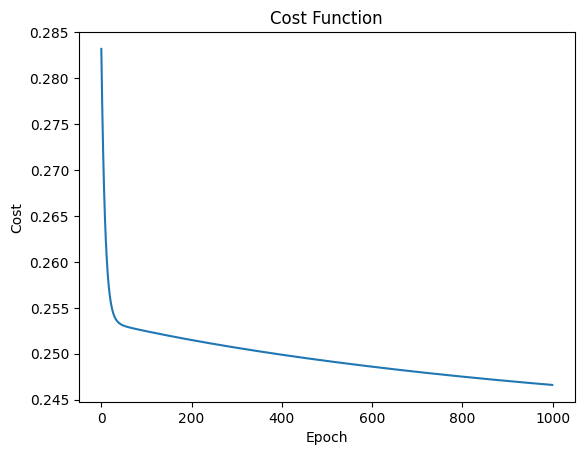

In [65]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

epochs = 1000
learning_rate = 0.1

# Train the network and get the cost history
trained_W1, trained_b1, trained_W2, trained_b2, cost_history = train(X, y, epochs, learning_rate, W1, b1, W2, b2)

# Plot the cost function
plt.plot(range(epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()
